# COVID19-India-Analysis [Kaggle Notebook](https://www.kaggle.com/samacker77k/covid19-india-analysis)
A notebook dedicated to data visualization and analysis of COVID19 Pandemic in India.

---

This notebook visualizes the effects of COVID19 pandemic in India to help understand the effect of the outbreak demographically.

Maintained by:
* Shivani Tyagi [LinkedIn](https://www.linkedin.com/in/shivani-tyagi-09/) [Github](https://github.com/shivitg)
* Nitika Kamboj [LinkedIn](https://linkedin.com/in/nitika-kamboj) [Github](https://github.com/nitika-kamboj)
* Samar Srivastava [LinkedIn](https://linkedin.com/in/samacker77l) [Github](https://github.com/samacker77)
 


---

### Fetching Data 
---

In [109]:
import requests
import pandas as pd
import logging
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

### Enable logging

In [110]:
loggers = {}

def get_logger(name):
    
    global loggers

    if loggers.get(name):
        return loggers.get(name)
    else:
        logger = logging.getLogger(name)
        logger.setLevel(logging.DEBUG)
        now = datetime.datetime.now()
        handler = logging.StreamHandler()
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        loggers[name] = logger
        return logger
    
logger = get_logger('COVID19 India Analysis Logger')

In [111]:
def fetch_data():
    url = 'http://portal.covid19india.org/export?_export=json'
    response = requests.get(url=url)
    if response.status_code == 200:
        logger.info('Connection enabled. Fetching data...')
        fetched_data = response.json()
        data = pd.DataFrame(fetched_data)
        print("Data fetched.")
        return data
    else:
        print('Connection failed. Please retry.')
        return

In [112]:
data = fetch_data()

2020-03-24 17:32:47,050 INFO Connection enabled. Fetching data...
2020-03-24 17:32:47,050 INFO Connection enabled. Fetching data...


Data fetched.


---
#### Now we have fetched data successfully. Now we will inspect the data. 

In [113]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 544 | Columns = 19


#### Checking dtypes

In [114]:
data.dtypes

Age                    float64
Contacts                object
Created on              object
Current location        object
Current location pt     object
Current status          object
Detected city           object
Detected city pt        object
Detected district       object
Detected state          object
Diagnosed date          object
Gender                  object
Government id           object
ID                       int64
Nationality             object
Notes                   object
Status change date      object
Unique id               object
Updated on              object
dtype: object

> On first look we see that the attributes 'ID' and 'Unique ID' are same. So we check if they have any values that are different. Before that we convert 'Unique ID' to int64 and compare. 

In [115]:
data['Unique id'] = data['Unique id'].astype('int64')

In [116]:
data[data['ID'] == data['Unique id']]

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,ID,Nationality,Notes,Status change date,Unique id,Updated on
0,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,1,03/23/2020 12:20 p.m.
1,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,2,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,2,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,3,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,3,03/23/2020 12:20 p.m.
3,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,4,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,4,03/23/2020 12:20 p.m.
4,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,5,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,5,03/23/2020 12:20 p.m.
5,69.0,"Patient 7:, Patient 8:, Patient 9:, Patient 10...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (75.82034899999999 26.916194),Recovered,Jaipur,SRID=4326;POINT (75.82034899999999 26.916194),Jaipur,Rajasthan,03/Mar/2020,Male,None,6,Italy,Travelled from Italy.\nItalian tourist,03/03/2020,6,03/23/2020 12:20 p.m.
6,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,7,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,7,03/23/2020 12:34 p.m.
7,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,8,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,8,03/23/2020 12:34 p.m.
8,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,9,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,9,03/23/2020 12:34 p.m.
9,55.0,Patient 6:,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (77.0299194 28.4646148),Hospitalized,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,04/Mar/2020,Unknown,None,10,Italy,Travelled from Italy.\nItalian tourist,03/04/2020,10,03/23/2020 12:34 p.m.


> Since we have same values in both columns. We can drop one of them and make another as the index

In [117]:
data.drop('Unique id',axis=1,inplace=True)

In [118]:
data.set_index('ID',inplace=True)

In [119]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 544 | Columns = 17


In [120]:
data.head()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on
ID,,,,,,,,,,,,,,,,,
1,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
3,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
4,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,03/23/2020 12:20 p.m.
5,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,03/23/2020 12:20 p.m.


#### Now the data is ready for analysis and preprocessing

> Graph between the count of affected people and Nationality.

In [121]:
data['Nationality'].value_counts()

India             310
Italy              18
Indonesia          10
United Kingdom      7
Indian              2
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

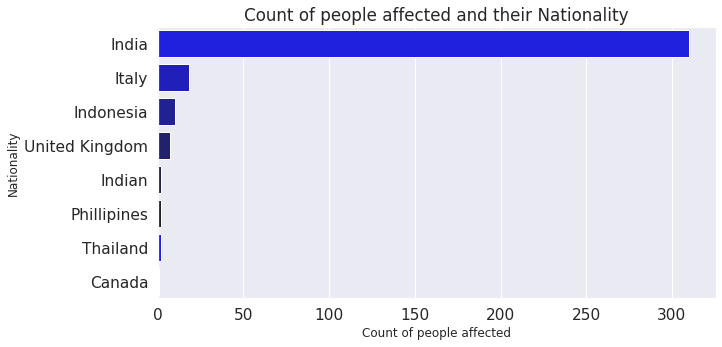

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> We can see from above graph that 'India' and 'Indian' are same nationality. We can replace 'Indian' with 'India'

In [123]:
data['Nationality']=data['Nationality'].replace('Indian','India')

In [124]:
data['Nationality'].value_counts()

India             312
Italy              18
Indonesia          10
United Kingdom      7
Phillipines         2
Thailand            2
Canada              1
Name: Nationality, dtype: int64

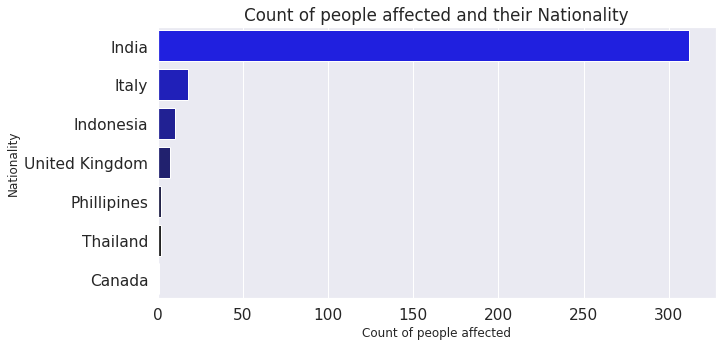

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(data['Nationality'].value_counts().values,data['Nationality'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Nationality')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

> Graph between gender and count of affected people.

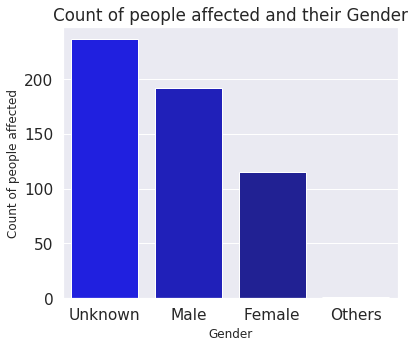

In [126]:
plt.figure(figsize=(6,5))
sns.barplot(data['Gender'].value_counts().index,data['Gender'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of people affected and their Gender')
plt.ylabel('Count of people affected', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

> Graph between different states and number of detected cases.

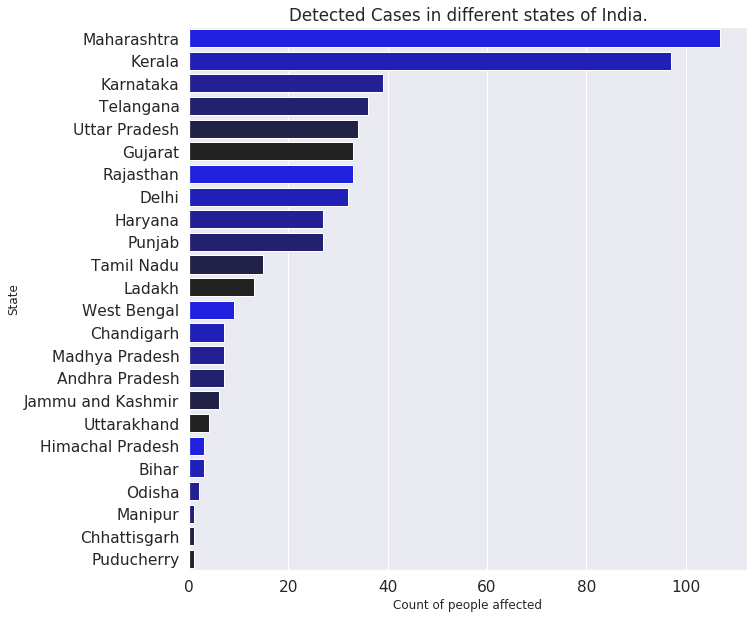

In [127]:
plt.figure(figsize=(10,10))
sns.barplot(data['Detected state'].value_counts().values,data['Detected state'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Detected Cases in different states of India.')
plt.xlabel('Count of people affected', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

> Graph displaying status and count of affected people.

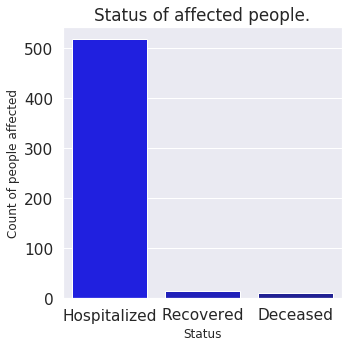

In [128]:
plt.figure(figsize=(5,5))
sns.barplot(data['Current status'].value_counts().index,data['Current status'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
plt.title('Status of affected people.')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count of people affected', fontsize=12)
plt.show()

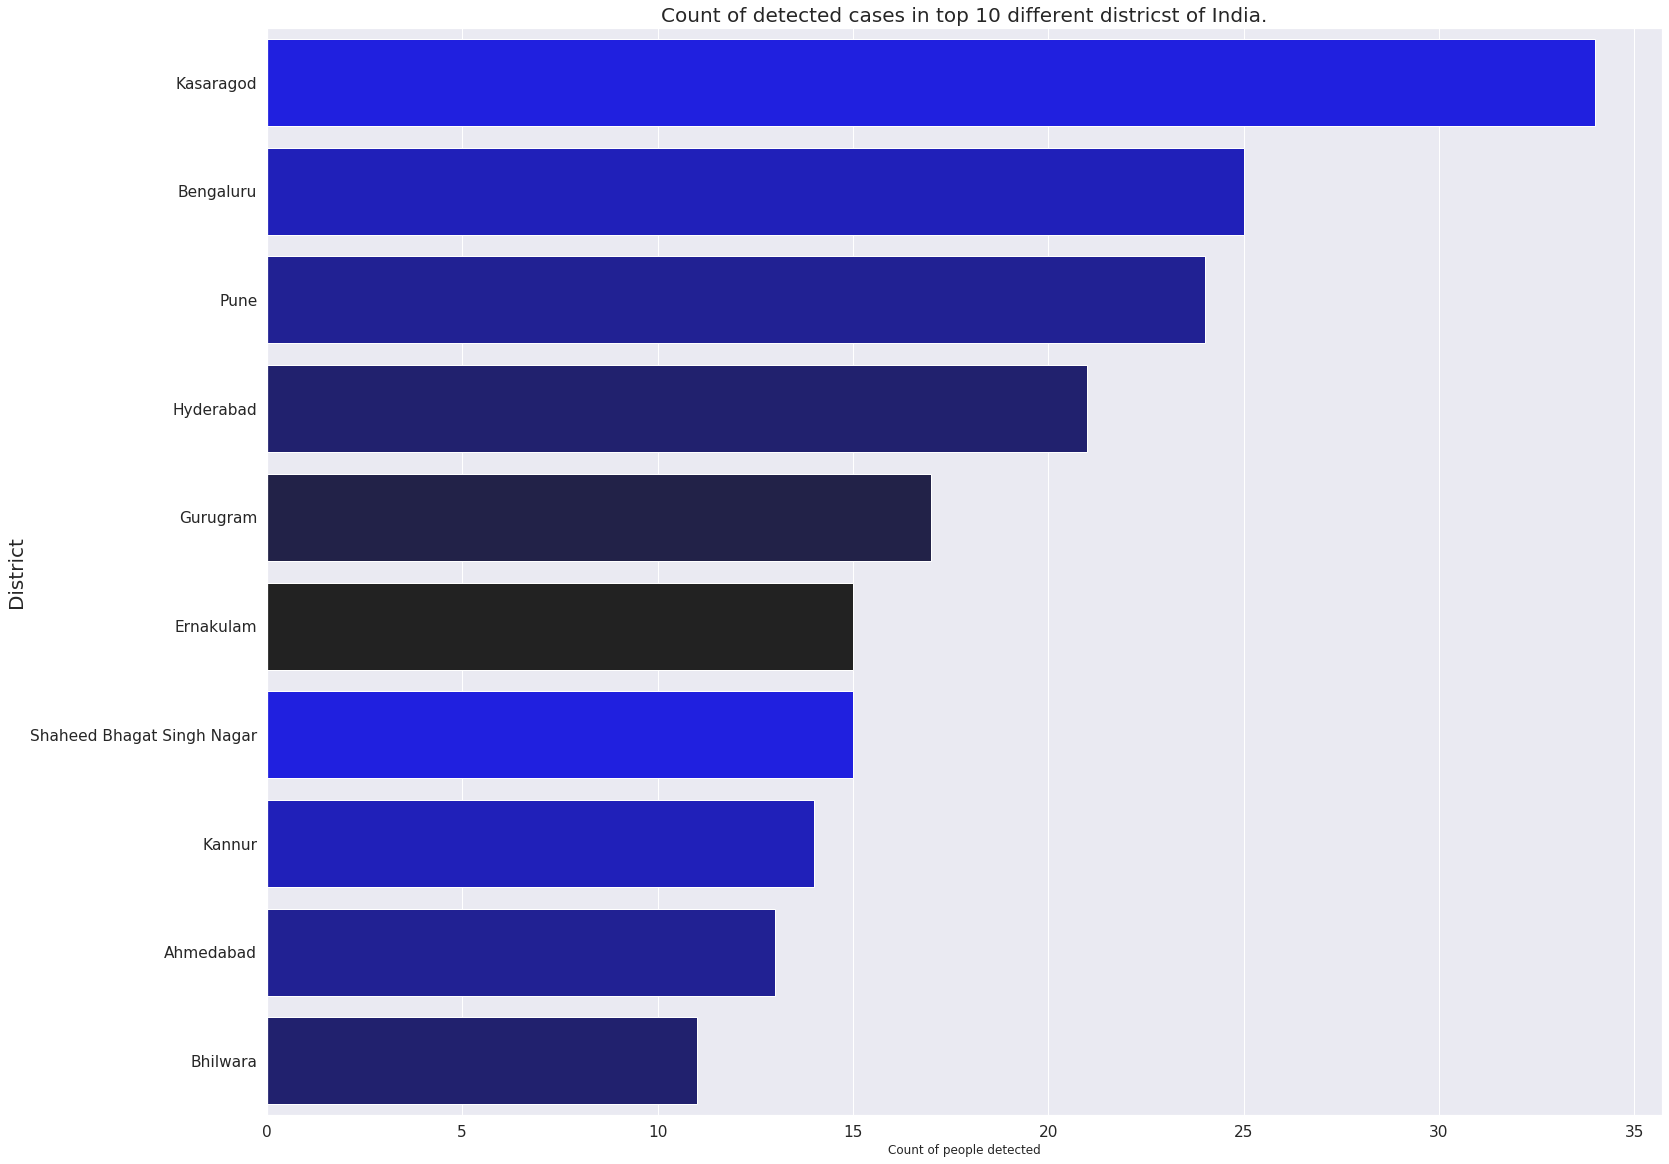

In [129]:
plt.figure(figsize=(25,20))
sns.barplot(data['Detected district'].value_counts()[:10].values,data['Detected district'].value_counts()[:10].index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Count of detected cases in top 10 different districst of India.',fontsize=20)
plt.xlabel('Count of people detected', fontsize=12)
plt.ylabel('District', fontsize=20)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.show()

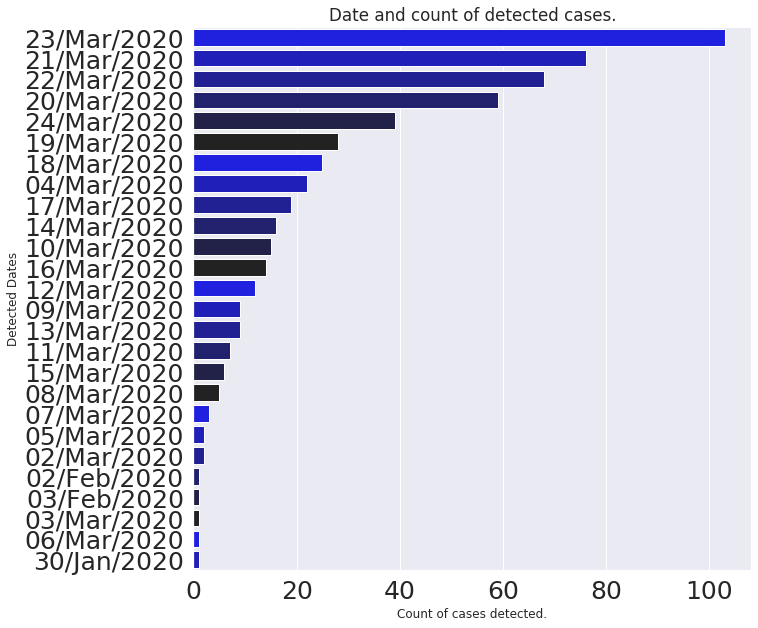

In [130]:
plt.figure(figsize=(10,10))
sns.barplot(data['Diagnosed date'].value_counts().values,data['Diagnosed date'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
plt.title('Date and count of detected cases.')
plt.xlabel('Count of cases detected.', fontsize=12)
plt.ylabel('Detected Dates', fontsize=12)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

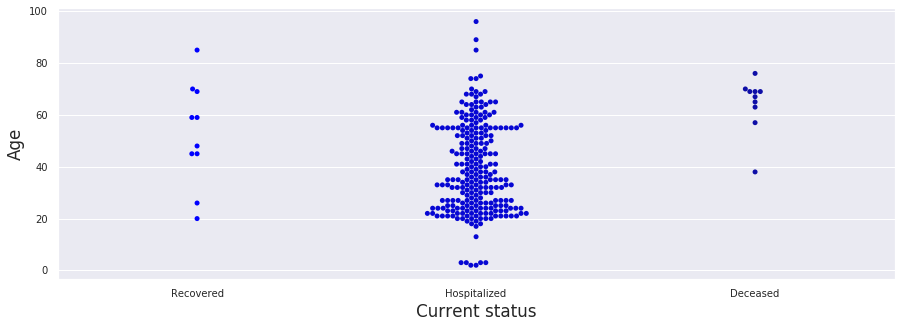

In [131]:
plt.figure(figsize=(15,5))
sns.swarmplot(data['Current status'],data['Age'],palette=sns.dark_palette("blue", reverse=True))


> ! This graph shows that the majority of people of hospitalized are in the age group of 20 - 79, and the deceased are the ones in the age group 60 - 80.

#### No. of days between change in status

In [132]:
data.head()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on
ID,,,,,,,,,,,,,,,,,
1,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
3,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
4,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,03/23/2020 12:20 p.m.
5,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,03/23/2020 12:20 p.m.


#### Days taken to change status(Hospitalized/Death/Recover)

In [133]:
data['status change difference'] = pd.to_datetime(data['Status change date'])-pd.to_datetime(data['Diagnosed date'])

In [134]:
data['status change difference'].astype('str')

ID
1       15 days 00:00:00.000000000
2       12 days 00:00:00.000000000
3       11 days 00:00:00.000000000
4       13 days 00:00:00.000000000
5        0 days 00:00:00.000000000
6        0 days 00:00:00.000000000
7        0 days 00:00:00.000000000
8        0 days 00:00:00.000000000
9        0 days 00:00:00.000000000
10       0 days 00:00:00.000000000
11       0 days 00:00:00.000000000
12       0 days 00:00:00.000000000
13       0 days 00:00:00.000000000
14       0 days 00:00:00.000000000
15       0 days 00:00:00.000000000
16       0 days 00:00:00.000000000
17       0 days 00:00:00.000000000
18       0 days 00:00:00.000000000
19       0 days 00:00:00.000000000
20       0 days 00:00:00.000000000
21       0 days 00:00:00.000000000
22       0 days 00:00:00.000000000
23       0 days 00:00:00.000000000
24       0 days 00:00:00.000000000
25       0 days 00:00:00.000000000
26       0 days 00:00:00.000000000
27       0 days 00:00:00.000000000
28       0 days 00:00:00.000000000
29       0 days 0

In [135]:
data.tail()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on,status change difference
ID,,,,,,,,,,,,,,,,,,
540,NaN,None,03/24/2020 4:54 p.m.,None,SRID=4326;POINT (72.8353355 18.9387711),Hospitalized,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,24/Mar/2020,Unknown,None,None,Details awaited,03/24/2020,03/24/2020 4:54 p.m.,0 days
541,NaN,None,03/24/2020 4:54 p.m.,None,SRID=4326;POINT (72.8353355 18.9387711),Hospitalized,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,24/Mar/2020,Unknown,None,None,Details awaited,03/24/2020,03/24/2020 4:54 p.m.,0 days
542,NaN,None,03/24/2020 4:54 p.m.,None,SRID=4326;POINT (72.8353355 18.9387711),Hospitalized,Mumbai,SRID=4326;POINT (72.8353355 18.9387711),None,Maharashtra,24/Mar/2020,Unknown,None,None,Details awaited,03/24/2020,03/24/2020 4:54 p.m.,0 days
543,NaN,None,03/24/2020 4:54 p.m.,None,SRID=4326;POINT (74.85802430085195 19.1627725),Hospitalized,Ahmednagar,SRID=4326;POINT (74.85802430085195 19.1627725),None,Maharashtra,24/Mar/2020,Unknown,None,None,Details awaited,03/24/2020,03/24/2020 4:54 p.m.,0 days
544,47.0,None,03/24/2020 4:54 p.m.,None,SRID=4326;POINT (77.3151087 28.5808133),Hospitalized,Noida,SRID=4326;POINT (77.3151087 28.5808133),None,Delhi,24/Mar/2020,Female,None,None,No travel history,03/24/2020,03/24/2020 4:54 p.m.,0 days


In [136]:
pd.to_datetime(data['Diagnosed date'])

ID
1     2020-01-30
2     2020-02-02
3     2020-02-03
4     2020-03-02
5     2020-03-02
6     2020-03-03
7     2020-03-04
8     2020-03-04
9     2020-03-04
10    2020-03-04
11    2020-03-04
12    2020-03-04
13    2020-03-04
14    2020-03-04
15    2020-03-04
16    2020-03-04
17    2020-03-04
18    2020-03-04
19    2020-03-04
20    2020-03-04
21    2020-03-04
22    2020-03-04
23    2020-03-04
24    2020-03-04
25    2020-03-04
26    2020-03-04
27    2020-03-04
28    2020-03-04
29    2020-03-05
30    2020-03-05
         ...    
515   2020-03-24
516   2020-03-24
517   2020-03-24
518   2020-03-24
519   2020-03-24
520   2020-03-24
521   2020-03-24
522   2020-03-24
523   2020-03-24
524   2020-03-24
525   2020-03-24
526   2020-03-24
527   2020-03-24
528   2020-03-24
529   2020-03-24
530   2020-03-24
531   2020-03-24
532   2020-03-24
533   2020-03-24
534   2020-03-24
535   2020-03-24
536   2020-03-24
537   2020-03-24
538   2020-03-24
539   2020-03-24
540   2020-03-24
541   2020-03-24
542   2020-

In [137]:
pd.to_datetime(data['Status change date'])

ID
1     2020-02-14
2     2020-02-14
3     2020-02-14
4     2020-03-15
5     2020-03-02
6     2020-03-03
7     2020-03-04
8     2020-03-04
9     2020-03-04
10    2020-03-04
11    2020-03-04
12    2020-03-04
13    2020-03-04
14    2020-03-04
15    2020-03-04
16    2020-03-04
17    2020-03-04
18    2020-03-04
19    2020-03-04
20    2020-03-04
21    2020-03-04
22    2020-03-04
23    2020-03-04
24    2020-03-04
25    2020-03-04
26    2020-03-04
27    2020-03-04
28    2020-03-04
29    2020-03-05
30    2020-03-05
         ...    
515   2020-03-24
516   2020-03-24
517   2020-03-24
518   2020-03-23
519   2020-03-23
520   2020-03-24
521   2020-03-24
522   2020-03-24
523   2020-03-24
524   2020-03-24
525   2020-03-24
526   2020-03-24
527   2020-03-24
528   2020-03-24
529   2020-03-24
530   2020-03-24
531   2020-03-24
532   2020-03-24
533   2020-03-24
534   2020-03-24
535   2020-03-24
536   2020-03-24
537   2020-03-24
538   2020-03-24
539   2020-03-24
540   2020-03-24
541   2020-03-24
542   2020-

In [138]:
data['status change difference'].value_counts()

0 days      426
-29 days    102
1 days        3
-1 days       3
8 days        2
12 days       1
13 days       1
2 days        1
3 days        1
9 days        1
15 days       1
10 days       1
11 days       1
Name: status change difference, dtype: int64

### As we can see that many of the dates in the 'Status Change Date' are incorrect due to which the status change difference comes out to be negative.

---

In [139]:
data.drop('status change difference',axis=1,inplace=True
         )

In [140]:
data.head()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on
ID,,,,,,,,,,,,,,,,,
1,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
3,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.
4,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,03/23/2020 12:20 p.m.
5,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,03/23/2020 12:20 p.m.


In [141]:
data['Transmission info'] = data['Contacts'].apply(lambda x : False if x == None else True)

In [142]:
data.head()

,Age,Contacts,Created on,Current location,Current location pt,Current status,Detected city,Detected city pt,Detected district,Detected state,Diagnosed date,Gender,Government id,Nationality,Notes,Status change date,Updated on,Transmission info
ID,,,,,,,,,,,,,,,,,,
1,20.0,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.21325419999999 10.5256264),Recovered,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,30/Jan/2020,Female,KL-TS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.,False
2,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (76.333482 9.498000100000001),Recovered,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,02/Feb/2020,Unknown,KL-AL-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.,False
3,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,03/Feb/2020,Unknown,KL-KS-P1,India,Travelled from Wuhan.\nStudent from Wuhan,02/14/2020,03/23/2020 12:20 p.m.,False
4,45.0,"Patient 22:, Patient 23:, Patient 24:, Patient...",03/23/2020 12:20 p.m.,None,SRID=4326;POINT (80 20),Recovered,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,02/Mar/2020,Male,DL-P1,India,"Travelled from Austria, Italy.\nTravel history...",03/15/2020,03/23/2020 12:20 p.m.,True
5,NaN,None,03/23/2020 12:20 p.m.,None,SRID=4326;POINT (78.4349398685041 17.4263524),Recovered,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,02/Mar/2020,Unknown,TS-P1,India,"Travelled from Dubai, Singapore contact.\nTrav...",03/02/2020,03/23/2020 12:20 p.m.,False


In [143]:
data['Transmission info'].value_counts()

False    391
True     153
Name: Transmission info, dtype: int64

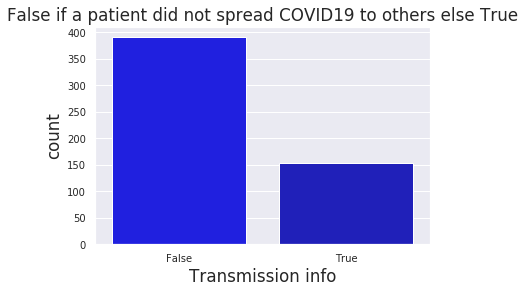

In [144]:
plt.title('False if a patient did not spread COVID19 to others else True')
sns.countplot(data['Transmission info'],palette=sns.dark_palette('blue',reverse=True))

> We can estimate how many people are carriers of COVID19

In [145]:
print("COVID19 estimated to be spread by {} people".format(data['Transmission info'].value_counts()[1]))

COVID19 estimated to be spread by 153 people


In [195]:
diagnose_data=pd.DataFrame({'Dates':pd.to_datetime(data['Diagnosed date']).value_counts().index,
                           'Count':pd.to_datetime(data['Diagnosed date']).value_counts().values})
diagnose_data=diagnose_data.sort_values('Dates')

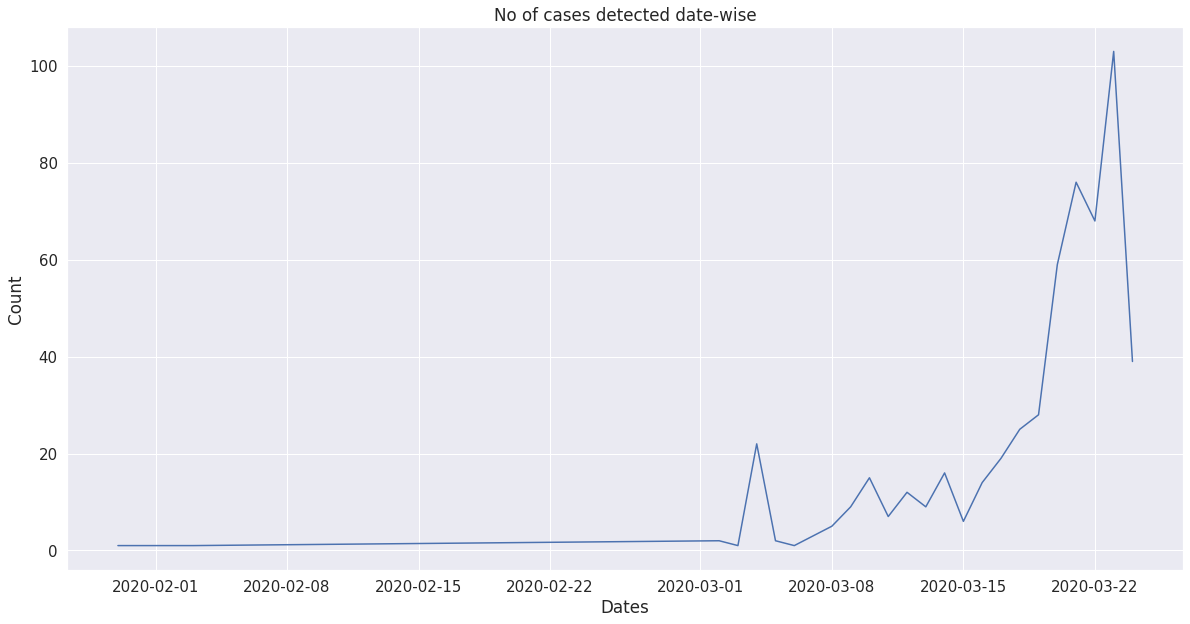

In [196]:
plt.figure(figsize=(20,10))
sns.lineplot(diagnose_data['Dates'],diagnose_data['Count'],palette=sns.dark_palette('blue',reverse=True))
plt.title('No of cases detected date-wise')
plt.rc('xtick',labelsize='15')
plt.rc('ytick',labelsize='15')